# Will They Pay Back The Loan? Modeling LendingClub Historical Data Loans Using Neural Network

## The Data

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model that can predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan.

The "loan_status" column contains our label.

### Data Overview

----
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

# Get The Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('TensorFlow_FILES/DATA/lending_club_loan_two.csv')

In [3]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [5]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [6]:
df.describe(include=['object'])

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
count,396030,396030,396030,373103,377729,396030,396030,396030,396030,396030,394275,396030,396030,396030,396030
unique,2,7,35,173105,11,6,3,115,2,14,48817,684,2,3,393700
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,Oct-2000,f,INDIVIDUAL,USCGC Smith\nFPO AE 70466
freq,302005,116018,26655,4389,126041,198348,139563,14846,318357,234507,152472,3017,238066,395319,8


In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

We could see that there are several missing values in our data, with most notably on number of mortgage accounts and the job title of the borrower.

# Exploratory Data Analysis

Text(0.5, 1.0, 'Number of Loan Status')

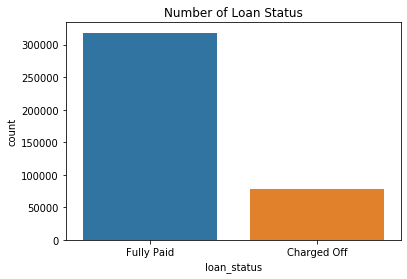

In [9]:
sns.countplot(df['loan_status'])
plt.title('Number of Loan Status')

The classes of loan status are unbalanced where fully paid class is more than 2 times than the one who charged off.

Text(0.5, 1.0, 'Distribution of Loan Amount')

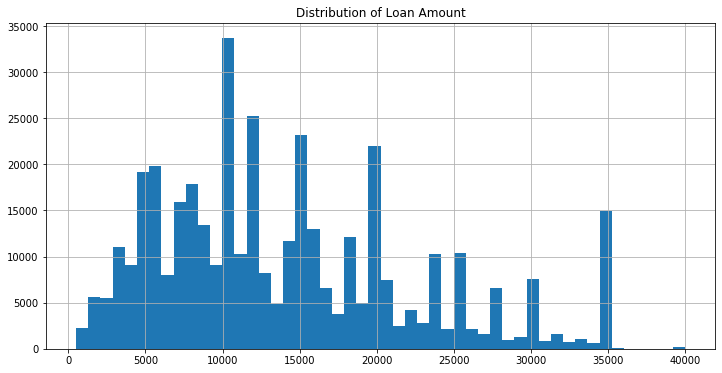

In [10]:
plt.figure(figsize=[12,6])
df['loan_amnt'].hist(bins=50)
plt.title('Distribution of Loan Amount')

Most of the people borrow for the amount of 10,000. We could see that there a quite of many people who borrow for the amount of 35,000.

In [11]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


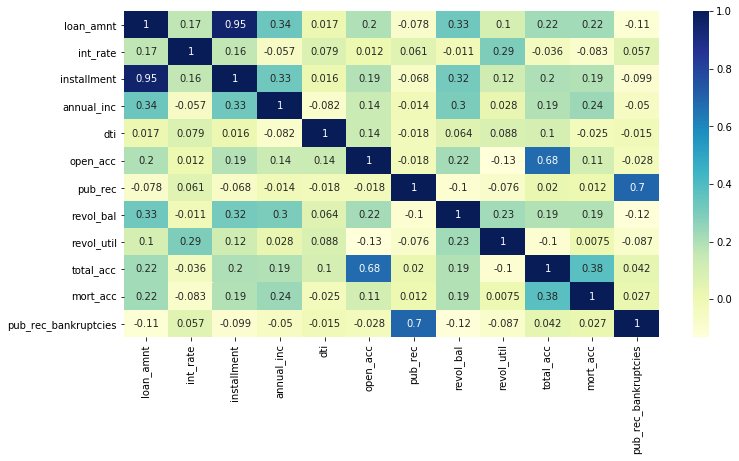

In [12]:
plt.figure(figsize=[12,6])
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')

There is a nearly perfect correlation between loan amount and installment. Why is that?

Text(0.5, 1.0, 'Loan Amount vs Installment')

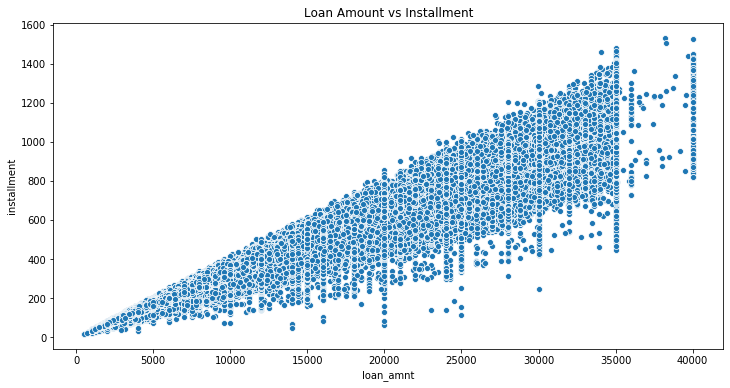

In [13]:
plt.figure(figsize=[12,6])
sns.scatterplot(x='loan_amnt',y='installment', data=df)
plt.title('Loan Amount vs Installment')

It turns out that installment is the monthly payment that the borrower need to pay, so it all makes sense that the borrower with high loan amount will surely has high installment and vice versa. Let's explore the grade and sub grade variables:

In [14]:
df.grade.unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

Text(0.5, 1.0, 'Count of Grade Per Loan Status')

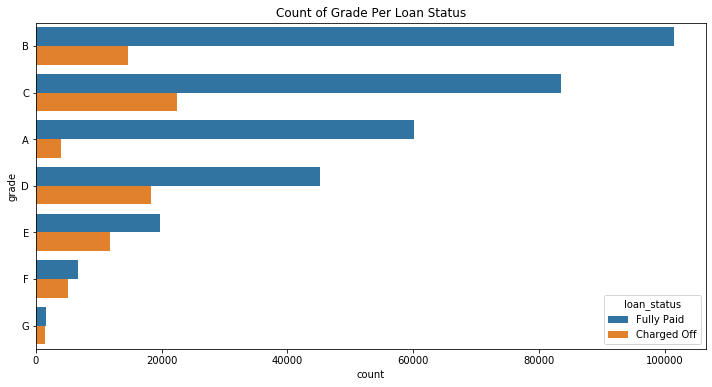

In [15]:
plt.figure(figsize=[12,6])
sns.countplot(y=df.grade, data=df, order=df.grade.value_counts().index, hue =df.loan_status)
plt.title('Count of Grade Per Loan Status')

Most of the people who borrowed are in category A to D. 

In [16]:
df.sub_grade.unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

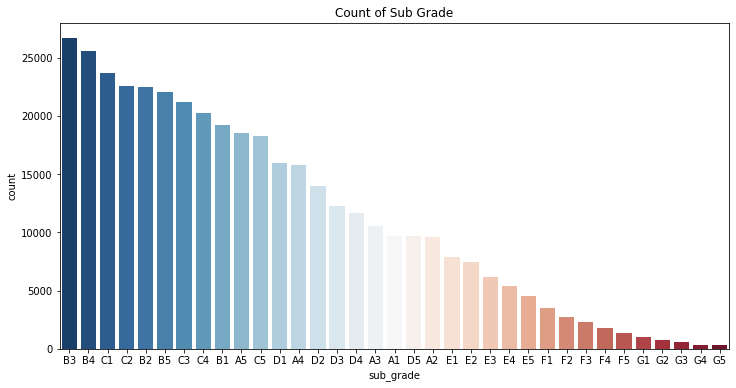

In [17]:
plt.figure(figsize=[12,6])
plt.title('Count of Sub Grade')
sns.countplot(x=df.sub_grade, data=df, order=df.sub_grade.value_counts().index, palette = "RdBu_r")

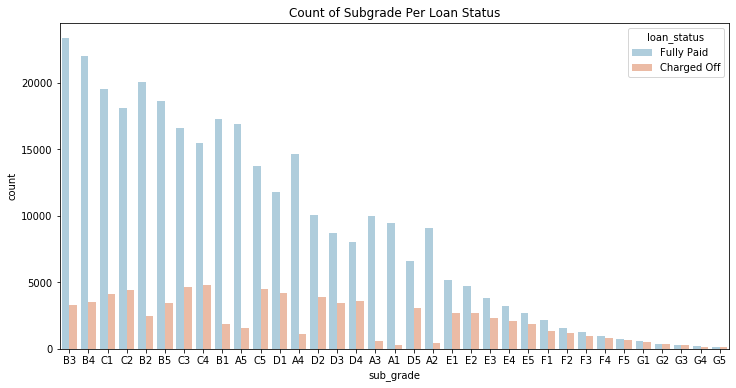

In [18]:
plt.figure(figsize=[12,6])
plt.title('Count of Subgrade Per Loan Status')
sns.countplot(x=df.sub_grade, data=df, order=df.sub_grade.value_counts().index, hue = df.loan_status,palette = "RdBu_r")

While on sub grade, the most dominant are sub grade B (B1,B2,B3,B5,B5). Because the F and G sub grade F and G don't look paid back often, let's take a look deeper into those sub grades:

In [19]:
grade_f_g = df[(df['grade'] == 'F') | (df['grade'] == 'G')]

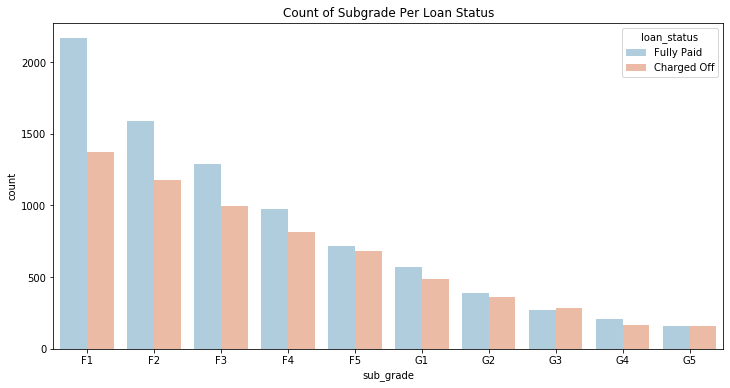

In [20]:
plt.figure(figsize=[12,6])
plt.title('Count of Subgrade Per Loan Status')
sns.countplot(x=grade_f_g.sub_grade, data=grade_f_g, order = grade_f_g.sub_grade.value_counts().index,hue = grade_f_g.loan_status,palette = "RdBu_r")

If we look deeper, the grade G is the one where number of borrowers that charged off are nearly the same with the one that fully paid.

Now, we created new variable that contain a 1 if the loan status is paid and a 0 if it was charged off:

In [21]:
df['loan_repaid'] = df.loan_status.apply(lambda x: 1 if x == 'Fully Paid' else 0)

In [22]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


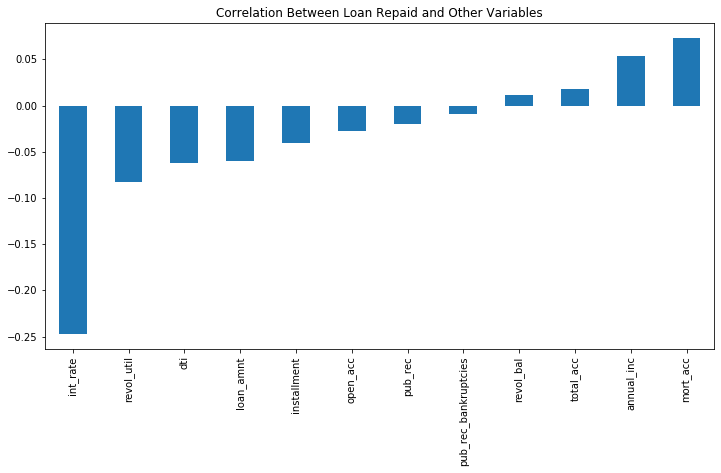

In [23]:
plt.figure(figsize=[12,6])
plt.title('Correlation Between Loan Repaid and Other Variables')
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

From the correlation above, all of the numerical variables are correlated poorly with our target column.

# Data Preprocessing
In this section, we would try to remove or fill any missing data and convert categorical features into dummy variables:

In [24]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


## Missing Value
Let's take a look once again to the missing value in our dataset:

In [25]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

Then, how many missing values on percentage?

In [26]:
df.isnull().sum()*100/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

Let's take a look at emp_tile and emp_length variables, is it safe to remove them?

In [27]:
df[['emp_title','emp_length']]

,emp_title,emp_length
0,Marketing,10+ years
1,Credit analyst,4 years
2,Statistician,< 1 year
3,Client Advocate,6 years
4,Destiny Management Inc.,9 years
...,...,...
396025,licensed bankere,2 years
396026,Agent,5 years
396027,City Carrier,10+ years
396028,"Gracon Services, Inc",10+ years


Basically, the variable tell the borrower job title and their year experiences. How many unique value for each variables?

In [28]:
df['emp_title'].value_counts()

Teacher                            4389
Manager                            4250
Registered Nurse                   1856
RN                                 1846
Supervisor                         1830
                                   ... 
Greater Latrobe School District       1
STATE OF ILLINOIS                     1
Global Gourmet                        1
Reliability Tech                      1
Provisioner                           1
Name: emp_title, Length: 173105, dtype: int64

There are too many of unique job titles in the dataset that realistically harder to convert into a dummy variable features and also harder to be interpreted so that we have to remove this column.

In [29]:
df.drop('emp_title', axis=1, inplace=True)

Then, let's take a look at job experiences:

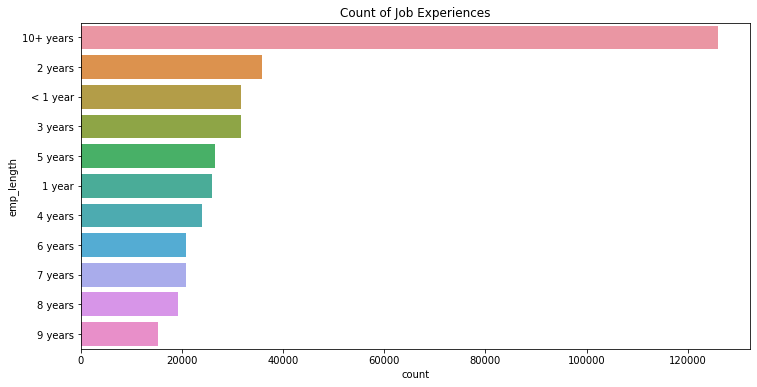

In [30]:
plt.figure(figsize=[12,6])
plt.title('Count of Job Experiences')
sns.countplot(y=df.emp_length, order=df.emp_length.value_counts().index)

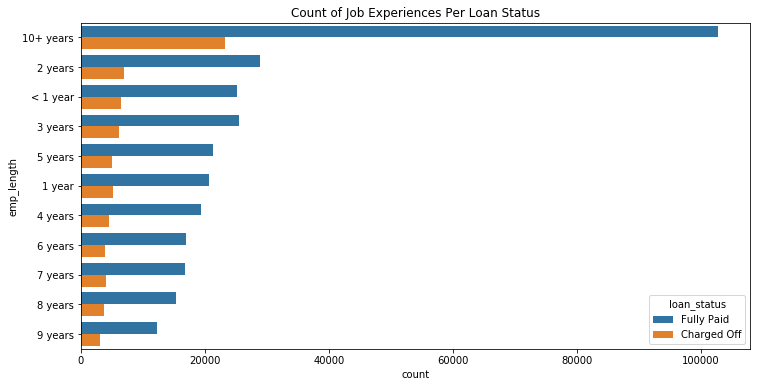

In [31]:
plt.figure(figsize=[12,6])
plt.title('Count of Job Experiences Per Loan Status')
sns.countplot(y=df.emp_length, order=df.emp_length.value_counts().index, hue=df.loan_status)

There are 11 unique values with most of our borrowers are employee with more than 10 years of experiences, however the graph above doesn't tell us which category that prone to be charged off, let's see the percentages of charged off borrower per category:

In [32]:
size = df.groupby(['emp_length', 'loan_status']).size().reset_index()

In [33]:
total = df.groupby(['emp_length']).count()['loan_repaid'].reset_index()

In [34]:
a = pd.merge(total, size, on='emp_length')
a.rename({0:'total_sub','loan_repaid':'total'},axis=1, inplace=True)
a['percentage'] = a.total_sub*100/a.total
a = a[a['loan_status'] == 'Charged Off'][['emp_length','percentage']]
a

,emp_length,percentage
0,1 year,19.913453
2,10+ years,18.418610
4,2 years,19.326206
6,3 years,19.523133
8,4 years,19.238477
10,5 years,19.218721
12,6 years,18.919438
14,7 years,19.477400
16,8 years,19.976002
18,9 years,20.047016


Well, since the percentage from each category is similar, we could assume that year of experiences will not affect our model so that we could drop the column:

In [35]:
df.drop('emp_length',axis=1,inplace=True)

Let's revisit the remaining missing columns:

In [36]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [37]:
df['title']

0                        Vacation
1              Debt consolidation
2         Credit card refinancing
3         Credit card refinancing
4           Credit Card Refinance
                   ...           
396025         Debt consolidation
396026         Debt consolidation
396027       pay off credit cards
396028              Loanforpayoff
396029          Toxic Debt Payoff
Name: title, Length: 396030, dtype: object

In [38]:
df.title.value_counts()

Debt consolidation                  152472
Credit card refinancing              51487
Home improvement                     15264
Other                                12930
Debt Consolidation                   11608
                                     ...  
Debt Consolidation for Savings           1
DebtConsolidationAndHomeProjects         1
helpandearn                              1
Merge Equipment Loan                     1
Gitter Done 504                          1
Name: title, Length: 48817, dtype: int64

It looks like the column here defining the purpose of loaning the money, is it same with the purpose column?

In [39]:
df[['title','purpose']]

,title,purpose
0,Vacation,vacation
1,Debt consolidation,debt_consolidation
2,Credit card refinancing,credit_card
3,Credit card refinancing,credit_card
4,Credit Card Refinance,credit_card
...,...,...
396025,Debt consolidation,debt_consolidation
396026,Debt consolidation,debt_consolidation
396027,pay off credit cards,debt_consolidation
396028,Loanforpayoff,debt_consolidation


In [40]:
df.groupby(['purpose','title']).size()

purpose  title                              
car       APRILIA TUONO 1000R                   1
          Auto                                  1
          Auto Loan                             2
          Winter Vehicle needed 4wheel drive    1
          auto loan                             1
                                               ..
wedding  weddingloan                            1
         wedds                                  1
         weding                                 1
         weeding                                1
         wonderful wedding                      1
Length: 54958, dtype: int64

It looks like that title is the subcategory of purpose variable, let's drop this column:

In [41]:
df.drop('title',axis=1,inplace=True)

What mort_acc variable represents?

In [42]:
df['mort_acc'].describe()

count    358235.000000
mean          1.813991
std           2.147930
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          34.000000
Name: mort_acc, dtype: float64

In [43]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

Which variable correlate the most with mort_acc?

In [44]:
df.corr()['mort_acc']

loan_amnt               0.222315
int_rate               -0.082583
installment             0.193694
annual_inc              0.236320
dti                    -0.025439
open_acc                0.109205
pub_rec                 0.011552
revol_bal               0.194925
revol_util              0.007514
total_acc               0.381072
mort_acc                1.000000
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
Name: mort_acc, dtype: float64

It turns out that total_acc is the one who correlate the most. We will input mean value mort_acc of each total_acc category in the missing value:

In [45]:
mean_morc_total = df.groupby(['total_acc']).mean()['mort_acc'].round()
mean_morc_total

total_acc
2.0      0.0
3.0      0.0
4.0      0.0
5.0      0.0
6.0      0.0
        ... 
124.0    1.0
129.0    1.0
135.0    3.0
150.0    2.0
151.0    0.0
Name: mort_acc, Length: 118, dtype: float64

In [46]:
def fill_mort_acc(x, y):
    if np.isnan(x):
        return(mean_morc_total[y])
    else: 
        return(x)

In [47]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['mort_acc'],x['total_acc']), axis=1)

In [48]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

The remaining missing values are revol_util and pub_rec_bankruptcies. However since the missing value on those variables are under 0.5%, we can safely drop the rows with missing values:

In [49]:
df.dropna(inplace = True)

In [50]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

## Categorical Variables and Dummy Variables
We are done dealing with the missing data, now we need to transfrom object datatypes into categorical datatypes and create dummy variables.

In [51]:
df.select_dtypes('object').columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [52]:
df.describe(include=['object'])

,term,grade,sub_grade,home_ownership,verification_status,issue_d,loan_status,purpose,earliest_cr_line,initial_list_status,application_type,address
count,395219,395219,395219,395219,395219,395219,395219,395219,395219,395219,395219,395219
unique,2,7,35,6,3,112,2,14,684,2,3,392898
top,36 months,B,B3,MORTGAGE,Verified,Oct-2014,Fully Paid,debt_consolidation,Oct-2000,f,INDIVIDUAL,USS Smith\nFPO AP 70466
freq,301247,115812,26611,198022,139451,14838,317696,234169,3013,237346,394508,8


### Term
Let's begin by transforming term variables into either 36 or 60:

In [53]:
df.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [54]:
df['term'] = df['term'].apply(lambda x: 36 if x == '36 months' else 60)

### Grade and Sub Grade
We know that grade is correlated with sub grade, so that we can drop the variable and transform the sub grade variable:

In [55]:
df.drop('grade', axis=1, inplace=True)

In [56]:
sub_grade = pd.get_dummies(df['sub_grade'], drop_first=True)
df = pd.concat([df, sub_grade], axis=1)
df.drop('sub_grade', axis=1, inplace=True)

### Home Ownership

In [57]:
df.home_ownership.value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

We need to combine other, none and any into one single class, other

In [58]:
home = {'NONE':'OTHER','ANY':'OTHER'}

In [59]:
df.home_ownership = df.home_ownership.map(home).fillna(df.home_ownership)

In [60]:
df.home_ownership.value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [61]:
ho = pd.get_dummies(df['home_ownership'], drop_first=True)
df = pd.concat([df, ho], axis=1)
df.drop('home_ownership', axis=1, inplace=True)

### Verification Status

In [62]:
df.verification_status.value_counts()

Verified           139451
Source Verified    131301
Not Verified       124467
Name: verification_status, dtype: int64

In [63]:
vs = pd.get_dummies(df['verification_status'], drop_first=True)
df = pd.concat([df,vs],axis=1)
df.drop('verification_status', axis=1, inplace=True)

### Issue Date
This variable is a data leakage that could give us future information for our model so that we need to drop the variable.

In [64]:
df.drop('issue_d', axis=1, inplace=True)

### Purpose

In [65]:
pur = pd.get_dummies(df['purpose'], drop_first=True)
df = pd.concat([df, pur], axis=1)
df.drop('purpose', axis=1, inplace=True)

### Earlises_Cr_Line

In [66]:
df['earliest_cr_line'].value_counts()

Oct-2000    3013
Aug-2000    2930
Oct-2001    2890
Aug-2001    2879
Nov-2000    2729
            ... 
Nov-1950       1
Aug-1962       1
May-1955       1
Aug-1960       1
Jul-1962       1
Name: earliest_cr_line, Length: 684, dtype: int64

It looks like a historical data. We would like to create two new variables from this variable: earliest_cr_month and earliest_cr_year

In [67]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda x: x[-4:]).astype('int64')
df['earliest_cr_year'].value_counts()

2000    29302
2001    29031
1999    26444
2002    25849
2003    23623
        ...  
1951        3
1950        3
1953        2
1948        1
1944        1
Name: earliest_cr_year, Length: 65, dtype: int64

In [68]:
df['earliest_cr_month'] = df['earliest_cr_line'].apply(lambda x: x[0:3])
df['earliest_cr_month']

0         Jun
1         Jul
2         Aug
3         Sep
4         Mar
         ... 
396025    Nov
396026    Feb
396027    Mar
396028    Nov
396029    Sep
Name: earliest_cr_month, Length: 395219, dtype: object

The month is still on the string, we need to convert it to numerical one:

In [69]:
import calendar
d = dict((v,k) for k,v in enumerate(calendar.month_abbr))
df['earliest_cr_month'] = df['earliest_cr_month'].map(d).astype('int64')
df['earliest_cr_month'].value_counts()

10    38226
9     37581
8     37279
11    35498
12    33601
7     31903
3     31556
1     30639
6     30393
5     30385
4     29177
2     28981
Name: earliest_cr_month, dtype: int64

In [70]:
df.drop('earliest_cr_line', axis=1, inplace=True)

### Initial List Status

In [71]:
ils = pd.get_dummies(df['initial_list_status'], drop_first=True)
df = pd.concat([df, ils], axis=1)
df.drop('initial_list_status', axis=1, inplace=True)

### Application Type

In [72]:
at = pd.get_dummies(df['application_type'], drop_first=True)
df = pd.concat([df, at], axis=1)
df.drop('application_type', axis=1, inplace=True)

### Address
We will try to get the zip code from the address variable:

In [73]:
df['address'].head()

0       0174 Michelle Gateway\nMendozaberg, OK 22690
1    1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2    87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3              823 Reid Ford\nDelacruzside, MA 00813
4               679 Luna Roads\nGreggshire, VA 11650
Name: address, dtype: object

In [74]:
df['zip_code'] = df['address'].apply(lambda x:x[-5:]).astype('int64')
df['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
813      45725
29597    45393
5113     45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [75]:
zip_code = pd.get_dummies(df['zip_code'], drop_first=True)
df = pd.concat([df, zip_code], axis=1)
df.drop('zip_code', axis=1, inplace=True)
df.drop('address', axis=1, inplace=True)

# Train, Validation and Test Split
In this section, we would like to divide the data into three parts: train, validation and test dataset for the ratio of 3:1:1.

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 81 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395219 non-null  float64
 1   term                  395219 non-null  int64  
 2   int_rate              395219 non-null  float64
 3   installment           395219 non-null  float64
 4   annual_inc            395219 non-null  float64
 5   loan_status           395219 non-null  object 
 6   dti                   395219 non-null  float64
 7   open_acc              395219 non-null  float64
 8   pub_rec               395219 non-null  float64
 9   revol_bal             395219 non-null  float64
 10  revol_util            395219 non-null  float64
 11  total_acc             395219 non-null  float64
 12  mort_acc              395219 non-null  float64
 13  pub_rec_bankruptcies  395219 non-null  float64
 14  loan_repaid           395219 non-null  int64  
 15  

In [77]:
df.drop('loan_status', axis=1, inplace=True)

In [78]:
X = df.drop('loan_repaid', axis=1).values
y = df['loan_repaid'].values

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.25, random_state=1)

# Normalize The Data
Then, we transform the data. For test dataset, we don't do fitting to prevent data leakages.

In [81]:
from sklearn.preprocessing import MinMaxScaler

In [82]:
scaler = MinMaxScaler()

In [83]:
X_train = scaler.fit_transform(X_train)
X_val =  scaler.fit_transform(X_val)

In [84]:
X_test = scaler.transform(X_test)

# Creating The Model
Let's go ahead by creating our first neural network model. For starter, let's create model with one layer

In [85]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.optimizers import Adam

In [86]:
X_train.shape

(237131, 79)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min',verbose = 1, patience = 5)

In [115]:
model = Sequential()

model.add(Dense(79, activation='relu'))
model.add(Dense(39, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [116]:
model.fit(X_train, y_train, batch_size=128, epochs=100, validation_data=(X_val, y_val), callbacks=[early_stop])

Train on 237131 samples, validate on 79044 samples
Epoch 1/100
237131/237131 [==============================] - 7s 30us/sample - loss: 0.2813 - val_loss: 0.3715
Epoch 2/100
237131/237131 [==============================] - 6s 27us/sample - loss: 0.2638 - val_loss: 0.4818
Epoch 3/100
237131/237131 [==============================] - 6s 26us/sample - loss: 0.2617 - val_loss: 0.5168
Epoch 4/100
237131/237131 [==============================] - 7s 31us/sample - loss: 0.2602 - val_loss: 0.4803
Epoch 5/100
237131/237131 [==============================] - 7s 28us/sample - loss: 0.2597 - val_loss: 0.5200
Epoch 6/100
237131/237131 [==============================] - 7s 30us/sample - loss: 0.2590 - val_loss: 0.5592
Epoch 00006: early stopping


Text(0.5, 1.0, 'Train Loss vs Validation Loss')

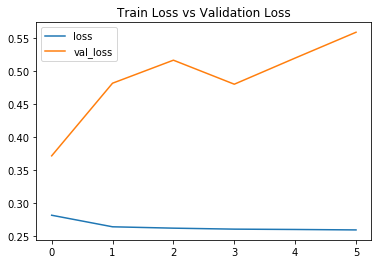

In [118]:
losses = pd.DataFrame(model.history.history)
losses.plot()
plt.title('Train Loss vs Validation Loss')

From the graph above, it is clear that the data perform poorly as the validation data loss is increasing along the epochs. Let's remodel the data by increasing batch size and using dropout technique:

In [111]:
from tensorflow.keras.layers import Dropout

In [120]:
model = Sequential()

model.add(Dense(79, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [121]:
model.fit(X_train, y_train, batch_size=512, epochs=100, validation_data=(X_val, y_val), callbacks=[early_stop])

Train on 237131 samples, validate on 79044 samples
Epoch 1/100
237131/237131 [==============================] - 4s 15us/sample - loss: 0.4019 - val_loss: 0.2702
Epoch 2/100
237131/237131 [==============================] - 3s 11us/sample - loss: 0.2877 - val_loss: 0.2700
Epoch 3/100
237131/237131 [==============================] - 3s 11us/sample - loss: 0.2775 - val_loss: 0.2702
Epoch 4/100
237131/237131 [==============================] - 3s 11us/sample - loss: 0.2738 - val_loss: 0.2717
Epoch 5/100
237131/237131 [==============================] - 3s 11us/sample - loss: 0.2712 - val_loss: 0.2695
Epoch 6/100
237131/237131 [==============================] - 3s 12us/sample - loss: 0.2694 - val_loss: 0.2711
Epoch 7/100
237131/237131 [==============================] - 3s 12us/sample - loss: 0.2689 - val_loss: 0.2716
Epoch 8/100
237131/237131 [==============================] - 3s 12us/sample - loss: 0.2679 - val_loss: 0.2748
Epoch 9/100
237131/237131 [==============================] - 3s 12us/

Text(0.5, 1.0, 'Train Loss vs Validation Loss')

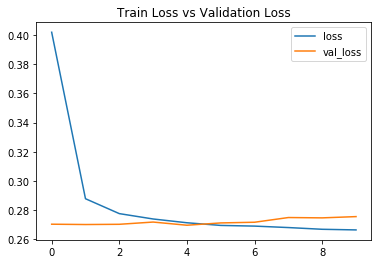

In [122]:
losses = pd.DataFrame(model.history.history)
losses.plot()
plt.title('Train Loss vs Validation Loss')

Well, from the graph above, we succeed to overcome the overfitting problem. Now let's predict on the unseen data.

# Prediction and Evaluation

In [123]:
predictions = model.predict_classes(X_test)

In [124]:
from sklearn.metrics import classification_report, confusion_matrix

In [125]:
print(confusion_matrix(y_test, predictions))

[[ 6564  8848]
 [   21 63611]]


In [126]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60     15412
           1       0.88      1.00      0.93     63632

    accuracy                           0.89     79044
   macro avg       0.94      0.71      0.77     79044
weighted avg       0.90      0.89      0.87     79044



We got the accuracy of 89%. However the recall for 0 or borrower who charge off is poor, under 50%. Why is that? How can we improve the model?

# Model Tuning
Because of business reasons, we need the the model to focus on reducing the false negative on the 0 class (borrower who predicted to be paid back but in reality charged off). So that, we need to improve the recall value from the previous model. Let's check the class balance between people who fully paid and charged off.

In [164]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

In [235]:
X = df.drop('loan_repaid', axis=1)
y = df['loan_repaid']

In [236]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.25, random_state=1)

In [205]:
sm = SMOTE(random_state=12)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [237]:
train = pd.concat([X_train,y_train],axis=1)
train['loan_repaid'].value_counts()

1    190499
0     46632
Name: loan_repaid, dtype: int64

It turns out that the fully paid class is nearly 4 times bigger than the one who charged off! This imbalanced problem cause the recall value on people who charged off is very low. So that to overcome that, we will do undersampled on the train dataset only as we don't want to give information to our validation and test dataset. Let's try by making the ratio of 6:4 between 1 and 0 class:

In [238]:
train_majority = train[train.loan_repaid == 1]
train_minority = train[train.loan_repaid == 0]

train_majority_upsampled = resample(train_majority, replace = True, n_samples = 69948, random_state=123)
train = pd.concat([train_majority_upsampled, train_minority])
train['loan_repaid'].value_counts()

1    69948
0    46632
Name: loan_repaid, dtype: int64

Well we succeed to make the class to be much more balanced, let's proceed to the next step:

In [239]:
X_train = train.drop('loan_repaid', axis=1).values
y_train = train['loan_repaid'].values

In [240]:
X_val = X_val.values
y_val= y_val.values
X_test = X_test.values
y_test = y_test.values

In [241]:
X_train = scaler.fit_transform(X_train)
X_val =  scaler.fit_transform(X_val)
X_test = scaler.transform(X_test)

## Model

In [261]:
model = Sequential()

model.add(Dense(79, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [262]:
model.fit(X_train, y_train, batch_size = 256, epochs=100, validation_data=(X_val, y_val), callbacks=[early_stop])

Train on 116580 samples, validate on 79044 samples
Epoch 1/100
116580/116580 [==============================] - 3s 26us/sample - loss: 0.5033 - val_loss: 0.3457
Epoch 2/100
116580/116580 [==============================] - 2s 19us/sample - loss: 0.3827 - val_loss: 0.3257
Epoch 3/100
116580/116580 [==============================] - 2s 19us/sample - loss: 0.3706 - val_loss: 0.3300
Epoch 4/100
116580/116580 [==============================] - 2s 20us/sample - loss: 0.3651 - val_loss: 0.3318
Epoch 5/100
116580/116580 [==============================] - 2s 20us/sample - loss: 0.3635 - val_loss: 0.3329
Epoch 6/100
116580/116580 [==============================] - 2s 20us/sample - loss: 0.3611 - val_loss: 0.3394
Epoch 7/100
116580/116580 [==============================] - 2s 20us/sample - loss: 0.3594 - val_loss: 0.3319
Epoch 00007: early stopping


Text(0.5, 1.0, 'Train Loss vs Validation Loss')

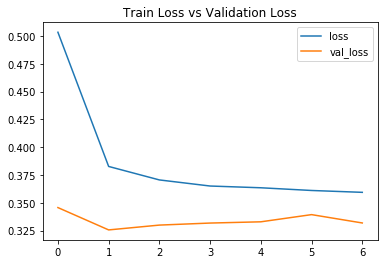

In [263]:
losses = pd.DataFrame(model.history.history)
losses.plot()
plt.title('Train Loss vs Validation Loss')

In [264]:
pred = model.predict_classes(X_test)

In [265]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.52      0.77      0.62     15412
           1       0.94      0.83      0.88     63632

    accuracy                           0.82     79044
   macro avg       0.73      0.80      0.75     79044
weighted avg       0.86      0.82      0.83     79044



We succeed to increase the recall value to 77% without sacrificing the total accuracy of the model!